In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pylab as plt
# from tqdm.auto import tqdm

In [2]:
import sys
sys.path.append("/hetghome/antonpr/xmax_sigma/flincpy")
from cascade.cascade_driver import CascadeDriver, InteractionModel
from utils.utils import suppress_std_streams

In [3]:
import chromo
target = chromo.kinematics.CompositeTarget([("N", 0.78), ("O", 0.22)])
ekin = chromo.kinematics.FixedTarget(1e7, "O16", target)
model = chromo.models.DpmjetIII191
    
int_model0 = InteractionModel(model, ekin, target)

In [4]:
cas_driver = CascadeDriver(int_model0)

In [5]:
mceq_decaying_pdgs = [-11, 11, -12, 12, -13, 13, -14, 14, 
                      -16, 16, 22, 
                        111, 130, -211, 211, 310, -321, 321, 
                        -411, 411, -421, 421, -431, 431, 
                        -2112, 2112, -2212, 2212, -3122, 3122
                        ]


cas_driver.simulation_parameters(pdg = 2212, energy = 1e2, 
                                 zenith_angle = 0, xdepth = 0,
                                 threshold_energy = 1e-6, stop_height = 0,
                                 accumulate_runs = True, reset_ids = True,
                                 mceq_decaying_pdgs = mceq_decaying_pdgs)


MCEqRun::set_interaction_model(): DPMJETIII191
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)
Tabulate cross-section for pi0(111)
Tabulate cross-section for K_L0(130)
Tabulate cross-section for pi-(-211)
Tabulate cross-section for pi+(211)
Tabulate cross-section for K_S0(310)
Tabulate cross-section for K-(-321)
Tabulate cross-section for K+(321)
Tabulate cross-section for D-(-411)
Tabulate cross-section for D+(411)
Tabulate cross-section for Dbar0(-421)
Tabulate cross-section for D0(421)
Tabulate cross-section for D_s-(-431)
Tabulate cross-section for D_s+(431)
Tabulate cross-section for nbar0(-2112)
Tabulate cross-section for n0(2112)
Tabulate cross-section for pbar-(-2212)
Tabulate cross-section for p+(2212)
Tabulate cross-section for Lambdabar0(-3122)
Tabulate cross-section for Lam

In [8]:
cas_driver.run(1000)

  0%|          | 3/1000 [00:00<00:38, 26.17it/s]

100%|██████████| 1000/1000 [00:36<00:00, 27.26it/s]


In [7]:
from cascade.cascade_analysis import CascadeAnalysis
cascade_analysis = CascadeAnalysis(cas_driver)
cascade_analysis.print_stats()

Number of runs = 100
Initial state:
  $p$(2212) with energy = 1.000e+02

Final state:
  Number of all particles in cascade = 17032
  Number of final particles = 11322
  Number of interactions = 598
  Number of decays = 5112
  Max number of generations = 9

  Max xdepth = 1036.099233683901
  Exectution time = 60.05 s
  Exectution time per run = 0.60 s
  Size of cascade_driver object = 9.22 Mb

Energy conservation in cascade:
  Initial energy = 1.00000e+02 GeV
  Energy in final particles = 1.05788e+02 GeV
  Relative loss(+)/gain(-) -5.788e-02
All final ids are unique, min = 7, max = 17031


{22: 247253, 14: 187044, -14: 183977, 11: 126050, -12: 124551, 2212: 104282, -11: 87223, 12: 85739, -13: 22495, 13: 19428, 2112: 17856, -2212: 1009, 211: 10, -211: 5, -2112: 1}


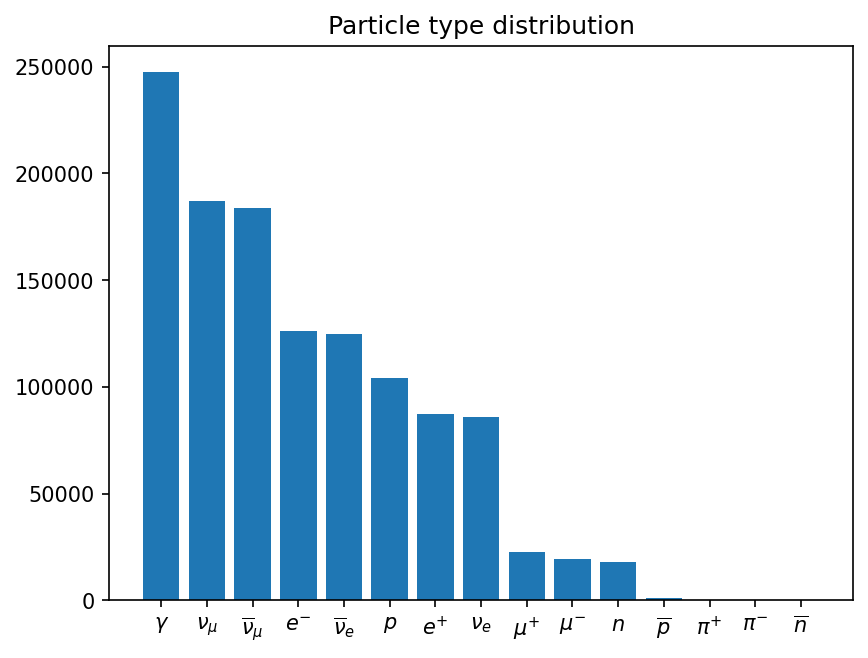

In [35]:
cascade_analysis.plot_ptypes_dist(from_ = 0)

In [86]:
final_particles = cas_driver.get_final_particles().valid()

In [24]:
from mceq_comparison import MCEQDistributions

In [25]:
mceq_loss = MCEQDistributions(
                 energy = 1e2,
                 pdg_id = 2212,
                 theta_deg = 0,
                 energy_range=[1e-2, 2e2],
                 slant_depths=[66, 143, 638, 1036.099233683901],
                 pname_tuples = [
                     ("mu", "mu+", "mu-"),
                     ("numu", "numu", "antinumu"),
                     ("nue", "nue", "antinue"),
                     ("pi", "pi+", "pi-"),
                     ("el", "e+", "e-"),
                     ("e+", "e+"),
                     ("e-", "e-")
                     ],
                #  interaction_model = "DPMJET-III-19.1",
                 interaction_model = "SIBYLL23D",
                 generic_losses_all_charged = True, 
                 enable_energy_loss = True, 
                 muon_helicity_dependence = True,
                 disable_decays = [],
                 hybrid_crossover=0.01,
                 density_model = ("CORSIKA", ("USStd", None)))

MCEqRun::set_interaction_model(): SIBYLL23D
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


In [38]:
mceq_noloss = MCEQDistributions(
                 energy = 1e2,
                 pdg_id = 2212,
                 theta_deg = 0,
                 energy_range=[1e-2, 2e2],
                 slant_depths=[66, 143, 638, 1033],
                 pname_tuples = [
                     ("mu", "mu+", "mu-"),
                     ("numu", "numu", "antinumu"),
                     ("nue", "nue", "antinue"),
                     ("pi", "pi+", "pi-"),
                     ("el", "e+", "e-"),
                     ("e+", "e+"),
                     ("e-", "e-")
                     ],
                 interaction_model = "DPMJET-III-19.1",
                 generic_losses_all_charged = False, 
                 enable_energy_loss = False, 
                 muon_helicity_dependence = False,
                 disable_decays = [],
                 hybrid_crossover=0.01,
                 density_model = ("CORSIKA", ("BK_USStd", None)))
                #  disable_decays = [-13, 13, -211, 211]
mceq_dist = mceq_noloss

MCEqRun::set_interaction_model(): DPMJETIII191


ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


Histogram of -13 with mass 0.10565837550000001
Histogram of 13 with mass 0.10565837550000001
Histogram of -12 with mass 0.0
Histogram of -12 with mass 0.0
Histogram of -14 with mass 0.0
Histogram of 14 with mass 0.0


Text(0, 0.5, 'Counts/bin/primary')

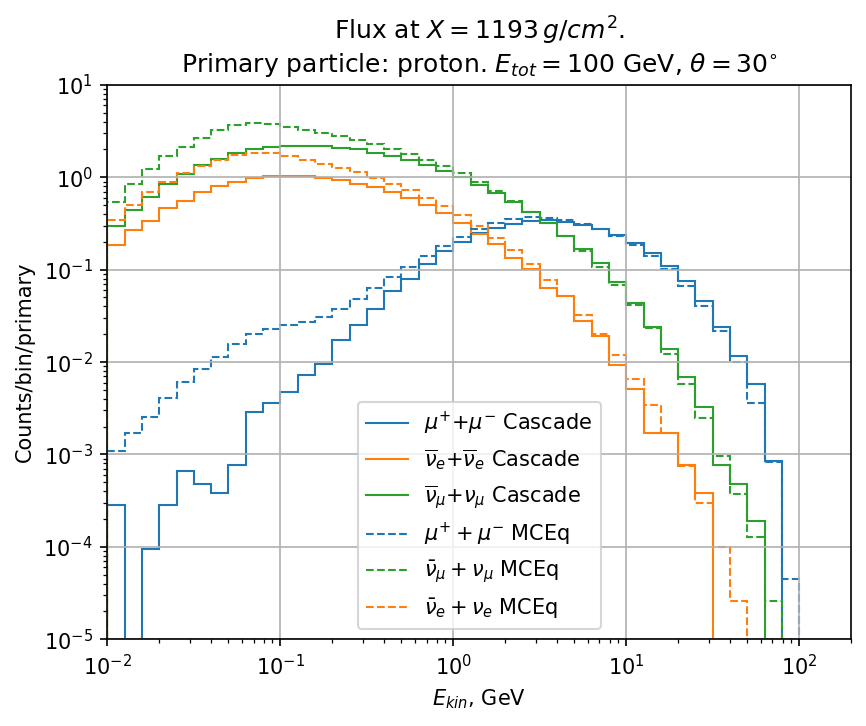

In [39]:
plt.rcParams["figure.dpi"] = 150
line_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-13, 13), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = f"{label} Cascade", linestyle='-', color = line_colors[0])

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-12, -12), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = f"{label} Cascade", linestyle='-', color = line_colors[1])

bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-14, 14), bins = mceq_dist.e_bins)
plt.stairs(hist, bins, label = f"{label} Cascade", linestyle='-', color = line_colors[2])

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-211, 211), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11, 11), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (-11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

# bins, hist, label = cascade_analysis.kin_energy_histogram(pdgs = (11,), bins = mceq_dist.e_bins)
# plt.stairs(hist, bins, label = label, linestyle='-')

ixdepth = 3
plt.stairs(mceq_dist.flux[ixdepth]["mu"], mceq_dist.e_bins, 
           label = r"${\mu}^{+} + {\mu}^{-}$ MCEq", linestyle='--',
           color = line_colors[0])


# plt.stairs(mceq_loss.flux["mu"], mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ loss mceq", linestyle=':')

# plt.stairs(mceq_hybrid.flux["mu"], mceq_dist.e_bins, 
#            label = r"${\mu}^{+} + {\mu}^{-}$ mceq hb", linestyle='--')
plt.stairs(mceq_dist.flux[ixdepth]["numu"], mceq_dist.e_bins, 
           label = r"$\bar{\nu}_{\mu} + {\nu}_{\mu}$ MCEq", linestyle='--',
           color = line_colors[2])
plt.stairs(mceq_dist.flux[ixdepth]["nue"], mceq_dist.e_bins, 
           label = r"$\bar{\nu}_{e} + {\nu}_{e}$ MCEq", linestyle='--',
           color = line_colors[1])
# plt.stairs(mceq_dist.flux["pi"], mceq_dist.e_bins, 
#            label = r"$\bar{\pi}^{+} + {\pi}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["el"], mceq_dist.e_bins, 
#            label = r"$\bar{e}^{+} + {e}^{-}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e+"], mceq_dist.e_bins, 
#            label = r"${e}^{+}$ mceq", linestyle='--')

# plt.stairs(mceq_dist.flux["e-"], mceq_dist.e_bins, 
#            label = r"${e}^{-}$ mceq", linestyle='--')

plt.xscale("log")
plt.yscale("log")
plt.xlim(1e-2, 2e2)
plt.ylim(1e-5, 10)
plt.legend()
plt.grid()
plt.title("Flux at " +  r"$X = 1193\, g/cm^2.$"+ "\nPrimary particle: proton. " 
          +  r"$E_{tot}=100$ GeV" + r", $\theta = 30^{\circ}$")
plt.xlabel(r"$E_{kin}$, GeV")
plt.ylabel(r"Counts/bin/primary")
# plt.savefig('temp.png', transparent=True)